# Linear Systems

## 1. Matrices and Norms

In [1]:
import numpy as np

In [2]:
n = 2
A = np.array([[1, 2], [0.499, 1.001]])

In [3]:
norm1 = np.linalg.norm(A, ord=1)
norm2 = np.linalg.norm(A, ord=2)
normfro = np.linalg.norm(A, ord='fro')
norminf = np.linalg.norm(A, ord=np.inf)

print ('Norm of A:')
print('Norm 1:', norm1)
print('Norm 2:', norm2)
print('Frobenius Norm:', normfro)
print('Infinity Norm:', norminf)

Norm of A:
Norm 1: 3.001
Norm 2: 2.500200104037774
Frobenius Norm: 2.5002003919686118
Infinity Norm: 3.0


In [4]:
cond1 = np.linalg.cond(A, p=1)
cond2 = np.linalg.cond(A, p=2)
condfro = np.linalg.cond(A, p='fro')
condinf = np.linalg.cond(A, p=np.inf)

print ('Condition number of A:')
print ('K(A)_1 =', cond1)
print ('K(A)_2 =', cond2)
print ('K(A)_fro =', condfro)
print ('K(A)_inf =', condinf)

Condition number of A:
K(A)_1 = 3001.0000000001082
K(A)_2 = 2083.666853410337
K(A)_fro = 2083.6673333334084
K(A)_inf = 3001.0000000001082


In [5]:
x = np.ones((2,1))
b = A @ x
print(b)

[[3. ]
 [1.5]]


In [6]:
btilde = np.array([[3], [1.4985]])
xtilde = np.array([[2, 0.5]]).T

In [7]:
# Verifying that xtilde is solution of the system A xtilde = btilde (Axtilde)
my_btilde = A @ xtilde
print ('A*xtilde =', btilde)
print(f"Frobenius norm of btilde - my_btilde = {np.linalg.norm(btilde-my_btilde,'fro')}")

A*xtilde = [[3.    ]
 [1.4985]]
Frobenius norm of btilde - my_btilde = 0.0


In [8]:
deltax = np.linalg.norm(x - xtilde, ord=2)
deltab = np.linalg.norm(b - btilde, ord=2)

print ('delta x =', deltax)
print ('delta b =', deltab)
print("delta x / delta b =", deltax / deltab)

delta x = 1.118033988749895
delta b = 0.0015000000000000568
delta x / delta b = 745.3559924999017


## 2.1 LU Factorization

In [9]:
import scipy
import scipy.linalg
from scipy.linalg import lu_factor as LUdec
from scipy.linalg import lu as LUfull

In [10]:
# creation of data and test problem
A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ])
x = np.ones((4,1))
b = A @ x
condA = np.linalg.cond(A)

In [11]:
print('x: \n', x , '\n')
print('x.shape: ', x.shape, '\n' )
print('b: \n', b , '\n')
print('b.shape: ', b.shape, '\n' )
print('A: \n', A, '\n')
print('A.shape: ', A.shape, '\n' )
print('K(A)=', condA, '\n')

x: 
 [[1.]
 [1.]
 [1.]
 [1.]] 

x.shape:  (4, 1) 

b: 
 [[ 1.]
 [ 6.]
 [-5.]
 [ 4.]] 

b.shape:  (4, 1) 

A: 
 [[ 3 -1  1 -2]
 [ 0  2  5 -1]
 [ 1  0 -7  1]
 [ 0  2  1  1]] 

A.shape:  (4, 4) 

K(A)= 14.208370392921381 



In [12]:
lu, piv = scipy.linalg.lu_factor(A)
print('lu',lu,'\n')
print('piv',piv,'\n')

lu [[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.33333333  0.16666667 -8.16666667  1.83333333]
 [ 0.          1.          0.48979592  1.10204082]] 

piv [0 1 2 3] 



In [13]:
# solving Ax = b   <--->  PLUx = b
my_x = scipy.linalg.lu_solve((lu, piv), b)

print('my_x = \n', my_x)
print('norm =', scipy.linalg.norm(x-my_x, 'fro'))

my_x = 
 [[1.]
 [1.]
 [1.]
 [1.]]
norm = 7.021666937153402e-16


### Alternative implementation

In [14]:
P, L, U = scipy.linalg.lu(A)

print (f'A = \n {A} \n')
print (f'P = \n {P} \n')
print (f'L = \n {L} \n')
print (f'U = \n {U} \n')

print (f'P*L*U = \n {np.matmul(P , np.matmul(L, U))} \n')
print ('diff = ',   np.linalg.norm(A - np.matmul(P , np.matmul(L, U)), 'fro'))

A = 
 [[ 3 -1  1 -2]
 [ 0  2  5 -1]
 [ 1  0 -7  1]
 [ 0  2  1  1]] 

P = 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

L = 
 [[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.33333333 0.16666667 1.         0.        ]
 [0.         1.         0.48979592 1.        ]] 

U = 
 [[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.          0.         -8.16666667  1.83333333]
 [ 0.          0.          0.          1.10204082]] 

P*L*U = 
 [[ 3. -1.  1. -2.]
 [ 0.  2.  5. -1.]
 [ 1.  0. -7.  1.]
 [ 0.  2.  1.  1.]] 

diff =  1.5700924586837752e-16


The following two cases can both be applied in this case since P = identity matrix.

In [15]:
# if P != np.eye(n):
# Ax = b   <--->  PLUx = b  <--->  LUx = inv(P)b  <--->  Ly=inv(P)b & Ux=y
invP = np.linalg.inv(P)
y = scipy.linalg.solve_triangular(L, invP@b, lower=True, unit_diagonal=True)
my_x = scipy.linalg.solve_triangular(U, y, lower=False)

print('Calculated solution:\n: ', my_x)
print('norm =', scipy.linalg.norm(x-my_x, 'fro'))

Calculated solution:
:  [[1.]
 [1.]
 [1.]
 [1.]]
norm = 5.438959822042073e-16


In [16]:
# if P == np.eye(n):
# Ax = b   <--->  PLUx = b  <--->  PLy=b & Ux=y
y = scipy.linalg.solve_triangular(np.matmul(P,L) , b, lower=True, unit_diagonal=True)
my_x = scipy.linalg.solve_triangular(U, y, lower=False)

print('Calculated solution:\n', my_x)
print('norm =', scipy.linalg.norm(x-my_x, 'fro'))

Calculated solution:
 [[1.]
 [1.]
 [1.]
 [1.]]
norm = 5.438959822042073e-16


## 2.2 Choleski factorizaion with Hilbert matrix



In [17]:
import matplotlib.pyplot as plt

In [18]:
# creation of data and test problem
n = 5
A = scipy.linalg.hilbert(n)
x = np.ones((n,1))
b = A @ x
condA = np.linalg.cond(A)

In [19]:
print('x: \n', x , '\n')
print('x.shape: ', x.shape, '\n' )
print('b: \n', b , '\n')
print('b.shape: ', b.shape, '\n' )
print('A: \n', A, '\n')
print('A.shape: ', A.shape, '\n' )
print('K(A) =', condA, '\n')

x: 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]] 

x.shape:  (5, 1) 

b: 
 [[2.28333333]
 [1.45      ]
 [1.09285714]
 [0.88452381]
 [0.74563492]] 

b.shape:  (5, 1) 

A: 
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]] 

A.shape:  (5, 5) 

K(A) = 476607.2502425855 



In [20]:
# Choleski factorization
L = scipy.linalg.cholesky(A, lower=True)
print('L:', L, '\n')
print('L.T*L =', L@L.T)
print('err = ', scipy.linalg.norm(A-L@L.T, 'fro'))

L: [[1.         0.         0.         0.         0.        ]
 [0.5        0.28867513 0.         0.         0.        ]
 [0.33333333 0.28867513 0.0745356  0.         0.        ]
 [0.25       0.25980762 0.1118034  0.01889822 0.        ]
 [0.2        0.23094011 0.12777531 0.03779645 0.0047619 ]] 

L.T*L = [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
err =  2.7755575615628914e-17


In [21]:
# solving the system
y = scipy.linalg.solve_triangular(L, b, lower=True)
my_x = scipy.linalg.solve_triangular(L.T, y, lower=False)
print('my_x = ', my_x)
print('norm =', scipy.linalg.norm(x-my_x, 'fro'))

my_x =  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
norm = 2.6732599660997558e-12


### 2.2.1 Choleski factorizaion with Hilbert matrices of increasing sizes


In [22]:
xmin, xmax = 5, 11

K_A = np.zeros((xmax - xmin,1))
Err = np.zeros((xmax - xmin,1))
xplot = np.arange(xmin, xmax)

In [23]:
for n in xplot:
    # creation of data and test problem
    A = scipy.linalg.hilbert(n)
    x = np.ones((n,1))
    b = A @ x

    # condition number
    K_A[n-xmin] = np.linalg.cond(A)

    # factorization
    L = scipy.linalg.cholesky(A)
    y = scipy.linalg.solve_triangular(L, b, lower=True)
    my_x = scipy.linalg.solve_triangular(L.T, y, lower=False)

    # relative error
    Err[n-xmin] = np.linalg.norm(x-my_x, ord=2)/np.linalg.norm(x, ord=2)


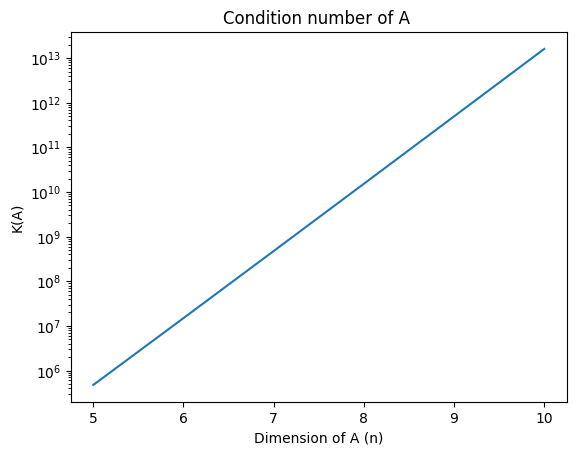

In [24]:
# graph of condition number vs matrix dimension
plt.semilogy(xplot, K_A)
plt.title('Condition number of A ')
plt.xlabel('Dimension of A (n)')
plt.ylabel('K(A)')
plt.show()

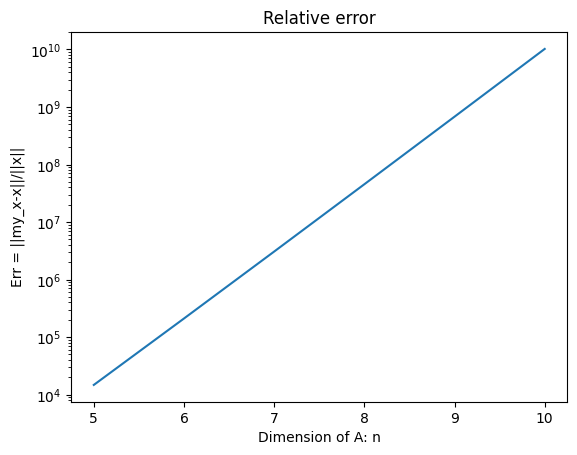

In [25]:
# graph of solution relative error vs matrix dimension
plt.semilogy(xplot, Err)
plt.title('Relative error')
plt.xlabel('Dimension of A: n')
plt.ylabel('Err = ||my_x-x||/||x||')
plt.show()

### 2.2.2 Failed Cholesky factorization due to rounding and algorithmic errors

In [26]:
for n in range(5, 20):
  A = scipy.linalg.hilbert(n)
  try:
    L = scipy.linalg.cholesky(A)
  except:
    print('Factorization failed for n =', n)

Factorization failed for n = 14
Factorization failed for n = 15
Factorization failed for n = 16
Factorization failed for n = 17
Factorization failed for n = 18
Factorization failed for n = 19
